# ДЗ №1 СУНЦ МГУ - Numpy practice

_Задачи позаимствованы из курса ML ФКН ПМИ где они были позаимствованы из курса практикума кафедры ММП факультета ВМК МГУ_ 

### Туториальные задачи
__(9 баллов)__

Ниже приведены задачи на работу с numpy-массивами. Для каждой из задач нужно привести 2 реализации: одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная (без использования питоновских циклов/map/list comprehension). Невекторизованная реализация каждой из задач оценивается в __0.5 балла__, векторизованная – в __1 балл__.

Реализации без использования векторизации нужно записать в файл functions.py, а векторизованные &mdash; в файл functions_vectorized.py

Для каждой задачи, приведённой ниже сравните скорость работы невекторизованной и векторизованной реализации. С помощью пакета matplotlib постройте графики времени работы в зависимости от размера данных. __Графики должны выглядеть опрятно!__ То есть должны быть подписаны оси, названия графиков, и т.д. Например, ниже представлены хороший и плохой графики:

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import functions as fs
import functions_vectorized as fsv
import timeit
import random
import scipy


def make_graphs(data_size, arrs_time, vecs_time, x_label):
    plt.plot(data_size, vecs_time, label=u'Векторизированная')
    plt.plot(data_size, arrs_time, label=u'Невекторизованная')
    plt.ylabel(u"Время (ms)")
    plt.xlabel(x_label)
    plt.grid()
    plt.legend()
    plt.show()

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ – 3.

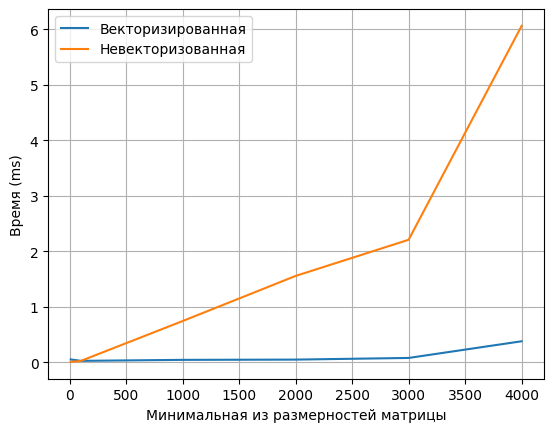

In [6]:
def prod_non_zero_diag_test():
    sizes = [(10, 20), (100, 200), (1000, 2000), (2000, 2000), (3000, 4000), (4000, 5000)]
    data_size = np.array([min(sz[0], sz[1]) for sz in sizes])
    arrs_time, vecs_time = np.zeros(len(sizes)), np.zeros(len(sizes))
    for i in range(len(sizes)):
        vecs = [np.random.randint(-100, 100, size=sizes[i]) for j in range(3)]
        arrs = [vec.tolist() for vec in vecs]
        for j in range(len(vecs)):
            arrs_time[i] += timeit.timeit(stmt=lambda: fs.prod_non_zero_diag(arrs[j]), globals=globals(),
                                          number=5) / 5 * 1000
            vecs_time[i] += timeit.timeit(stmt=lambda: fsv.prod_non_zero_diag(vecs[j]), globals=globals(),
                                          number=5) / 5 * 1000
        arrs_time[i] /= len(vecs)
        vecs_time[i] /= len(vecs)
    make_graphs(data_size, arrs_time, vecs_time, u"Минимальная из размерностей матрицы")


prod_non_zero_diag_test()

 
 
* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ – True.
  
  


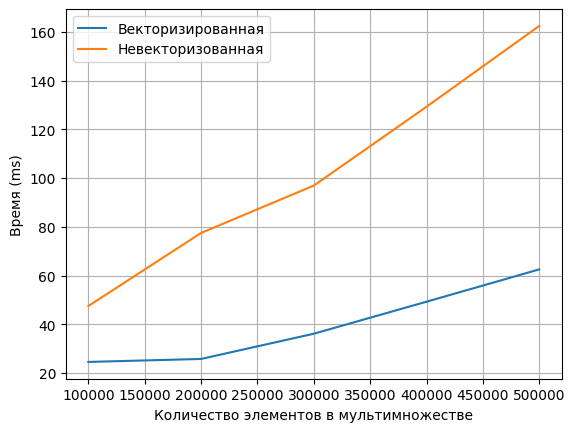

In [5]:
def are_multisets_equal_test():
    sizes = [100000, 200000, 300000, 400000, 500000]
    data_size = sizes
    arrs_time, vecs_time = np.zeros(len(sizes)), np.zeros(len(sizes))
    for i in range(len(sizes)):
        vecs1 = [np.random.randint(-100, 100, size=sizes[i]) for j in range(3)]
        vecs2 = [(vecs1[j] if random.randint(0, 1) else np.random.randint(-100, 100, size=sizes[i])) for j in
                 range(len(vecs1))]
        arrs1 = [vec.tolist() for vec in vecs1]
        arrs2 = [vec.tolist() for vec in vecs2]
        for j in range(len(vecs1)):
            arrs_time[i] += timeit.timeit(stmt=lambda: fs.are_multisets_equal(arrs1[j], arrs2[j]), globals=globals(),
                                          number=5) / 5 * 1000
            vecs_time[i] += timeit.timeit(stmt=lambda: fsv.are_multisets_equal(vecs1[j], vecs2[j]), globals=globals(),
                                          number=5) / 5 * 1000
        arrs_time[i] /= len(vecs1)
        vecs_time[i] /= len(vecs1)

    make_graphs(data_size, arrs_time, vecs_time, u"Количество элементов в мультимножестве")


are_multisets_equal_test()


* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.  
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ – 5.

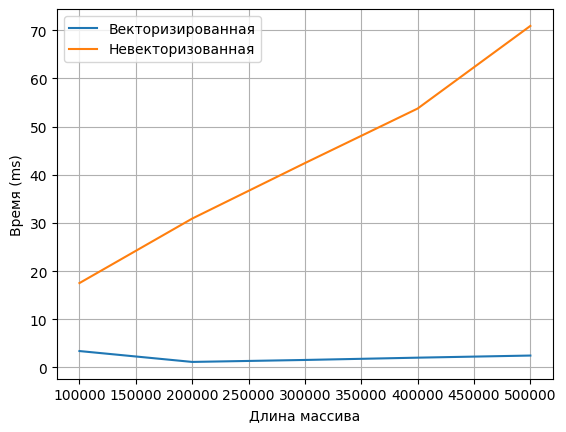

In [7]:
def max_after_zero_test():
    sizes = [100000, 200000, 300000, 400000, 500000]
    data_size = sizes
    arrs_time, vecs_time = np.zeros(len(sizes)), np.zeros(len(sizes))
    for i in range(len(sizes)):
        vecs = [np.random.randint(0, 10, size=sizes[i]) for j in range(3)]
        arrs = [vec.tolist() for vec in vecs]
        for j in range(len(vecs)):
            arrs_time[i] += timeit.timeit(stmt=lambda: fs.max_after_zero(arrs[j]), globals=globals(),
                                          number=5) / 5 * 1000
            vecs_time[i] += timeit.timeit(stmt=lambda: fsv.max_after_zero(vecs[j]), globals=globals(),
                                          number=5) / 5 * 1000
        arrs_time[i] /= len(vecs)
        vecs_time[i] /= len(vecs)

    make_graphs(data_size, arrs_time, vecs_time, u"Длина массива")


max_after_zero_test()

 
 
* __ Задача 4__: Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). В ноутбуке приведите пример работы функции – преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow).


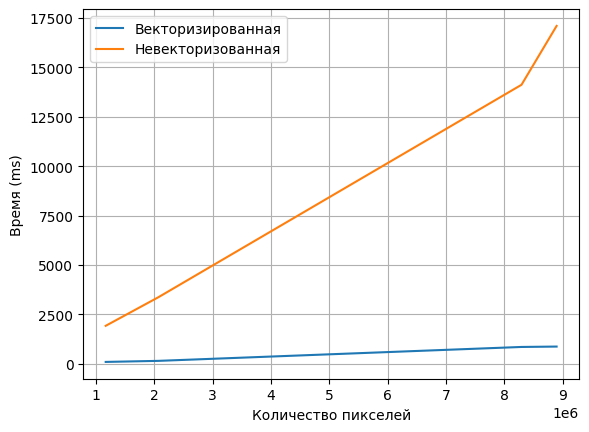

In [7]:
import imageio.v3 as iio


def convert_image_test():
    vecs = [iio.imread(f'imgs/i{i}.png') for i in range(4)]
    arrs = [vec.tolist() for vec in vecs]
    data_size = [len(vecs[i]) * len(vecs[i][0]) for i in range(len(vecs))]
    arrs_time, vecs_time = np.zeros(len(vecs)), np.zeros(len(vecs))
    arr_koefs = [0.299, 0.587, 0.114]
    vec_koefs = np.array(arr_koefs)
    for i in range(len(vecs)):
        arrs_time[i] = timeit.timeit(stmt=lambda: fs.convert_image(arrs[i], arr_koefs), globals=globals(),
                                     number=1) * 1000
        vecs_time[i] = timeit.timeit(stmt=lambda: fsv.convert_image(vecs[i], vec_koefs), globals=globals(),
                                     number=1) * 1000
        iio.imwrite(f'imgs/arrs{i}.png', np.array(fs.convert_image(arrs[i], arr_koefs), np.uint8))
        iio.imwrite(f'imgs/vecs{i}.png', fsv.convert_image(vecs[i], vec_koefs))
    make_graphs(data_size, arrs_time, vecs_time, u"Количество пикселей")


convert_image_test()

* __Задача 5__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ – (np.array([2, 3, 5]), np.array([3, 3, 1])).

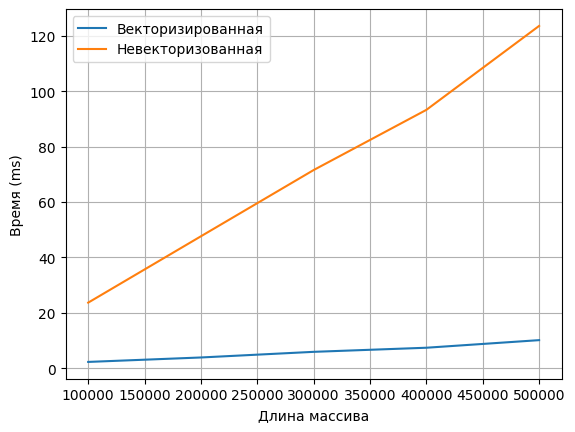

In [3]:
def run_length_encoding_test():
    sizes = [100000, 200000, 300000, 400000, 500000]
    data_size = sizes
    arrs_time, vecs_time = np.zeros(len(sizes)), np.zeros(len(sizes))
    for i in range(len(sizes)):
        vecs = [np.random.randint(0, 10, size=sizes[i]) for j in range(3)]
        arrs = [vec.tolist() for vec in vecs]
        for j in range(len(vecs)):
            arrs_time[i] += timeit.timeit(stmt=lambda: fs.run_length_encoding(arrs[j]), globals=globals(),
                                          number=5) / 5 * 1000
            vecs_time[i] += timeit.timeit(stmt=lambda: fsv.run_length_encoding(vecs[j]), globals=globals(),
                                          number=5) / 5 * 1000
        arrs_time[i] /= len(vecs)
        vecs_time[i] /= len(vecs)

    make_graphs(data_size, arrs_time, vecs_time, u"Длина массива")


run_length_encoding_test()

 
 
* __Задача 6__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Дополнительно сравните с функцией scipy.spatial.distance.cdist по скорости работы (сравнения приведите ниже в ноутбуке).

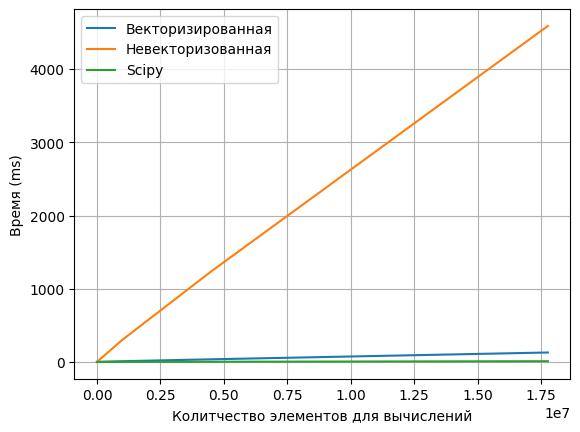

In [3]:
def pairwise_distance_test():
    sizes = [((5, 3), (10, 3)), ((100, 50), (200, 50)), ((150, 200), (150, 200)), ((200, 444), (200, 444))]
    data_size = [sz[0][0] * sz[1][0] * sz[0][1] for sz in sizes]
    arrs_time, vecs_time, scipy_time = np.zeros(len(sizes)), np.zeros(len(sizes)), np.zeros(len(sizes))
    for i in range(len(sizes)):
        vecs = [np.random.random(sz) * 100 for sz in sizes[i]]
        arrs = [v.tolist() for v in vecs]
        arrs_time[i] = timeit.timeit(stmt=lambda: fs.pairwise_distance(*arrs), globals=globals(),
                                     number=2) / 2 * 1000
        vecs_time[i] = timeit.timeit(stmt=lambda: fsv.pairwise_distance(*vecs), globals=globals(),
                                     number=2) / 2 * 1000
        scipy_time[i] = timeit.timeit(stmt=lambda: scipy.spatial.distance.cdist(*vecs), globals=globals(),
                                      number=2) / 2 * 1000
    plt.plot(data_size, vecs_time, label='Векторизированная')
    plt.plot(data_size, arrs_time, label='Невекторизованная')
    plt.plot(data_size, scipy_time, label='Scipy')
    plt.ylabel(u"Время (ms)")
    plt.xlabel(u"Колитчество элементов для вычислений")
    plt.grid()
    plt.legend()
    plt.show()


pairwise_distance_test()

### Туториал по Markdown

__(1 балл)__

Напишите краткий (а в данной домашке ещё и почти бесмысленный) отчёт с использованием 4-5 различных вариантов разметки/выделения текста.

### Общий итог
Я вспомнил: 
+ *Что matplotlib умеет строить диаграмки*
+ **Картинки надо готовить перед обработкой(убрать альфа канал и т.д.)**
> Как говорил великий классик, все это лишь игра.

Нужно писать какой-то код, и не только 
```python
print("Hello world!")
```